<div align="center"><h3>HW4, Question 1</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configuration Parameter

In [11]:
SAVE_FIGURE = False

# Initialization

In [303]:
bird = cv2.imread('data/1/bird.jpg').astype(int)
car = cv2.imread('data/1/car.jpg').astype(int)
festival = cv2.imread('data/1/holi-festival.jpg').astype(int)

# Part A & B

In [310]:
def kmeans(x_train, k):
    number_of_data = x_train.shape[0]
    number_of_features = x_train.shape[1]
    a = np.random.choice(range(number_of_data), k, replace=False)
    centers = x_train[a,:]
    current_centers = centers
    distance_between_new_and_previous_centers = float("inf")
    while distance_between_new_and_previous_centers > 0.001:
        previous_centers = current_centers
        distances = np.zeros((k, number_of_data))
        for i, center in enumerate(centers):
            distances[i, :] = \
                np.sqrt(np.sum((x_train - center)**2, axis=1))
        y_predicted = np.argmin(distances, axis=0)
        centers = np.zeros((k, number_of_features))
        for i in range(k):
            centers[i, :] = np.mean(x_train[y_predicted==i,:], axis=0)
        current_centers = centers
        distance_between_new_and_previous_centers = \
            np.sqrt(np.sum((current_centers - previous_centers)**2))
    return centers, y_predicted

C:\Users\engmrgh\AppData\Local\Temp\ipykernel_16196\2215645269.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


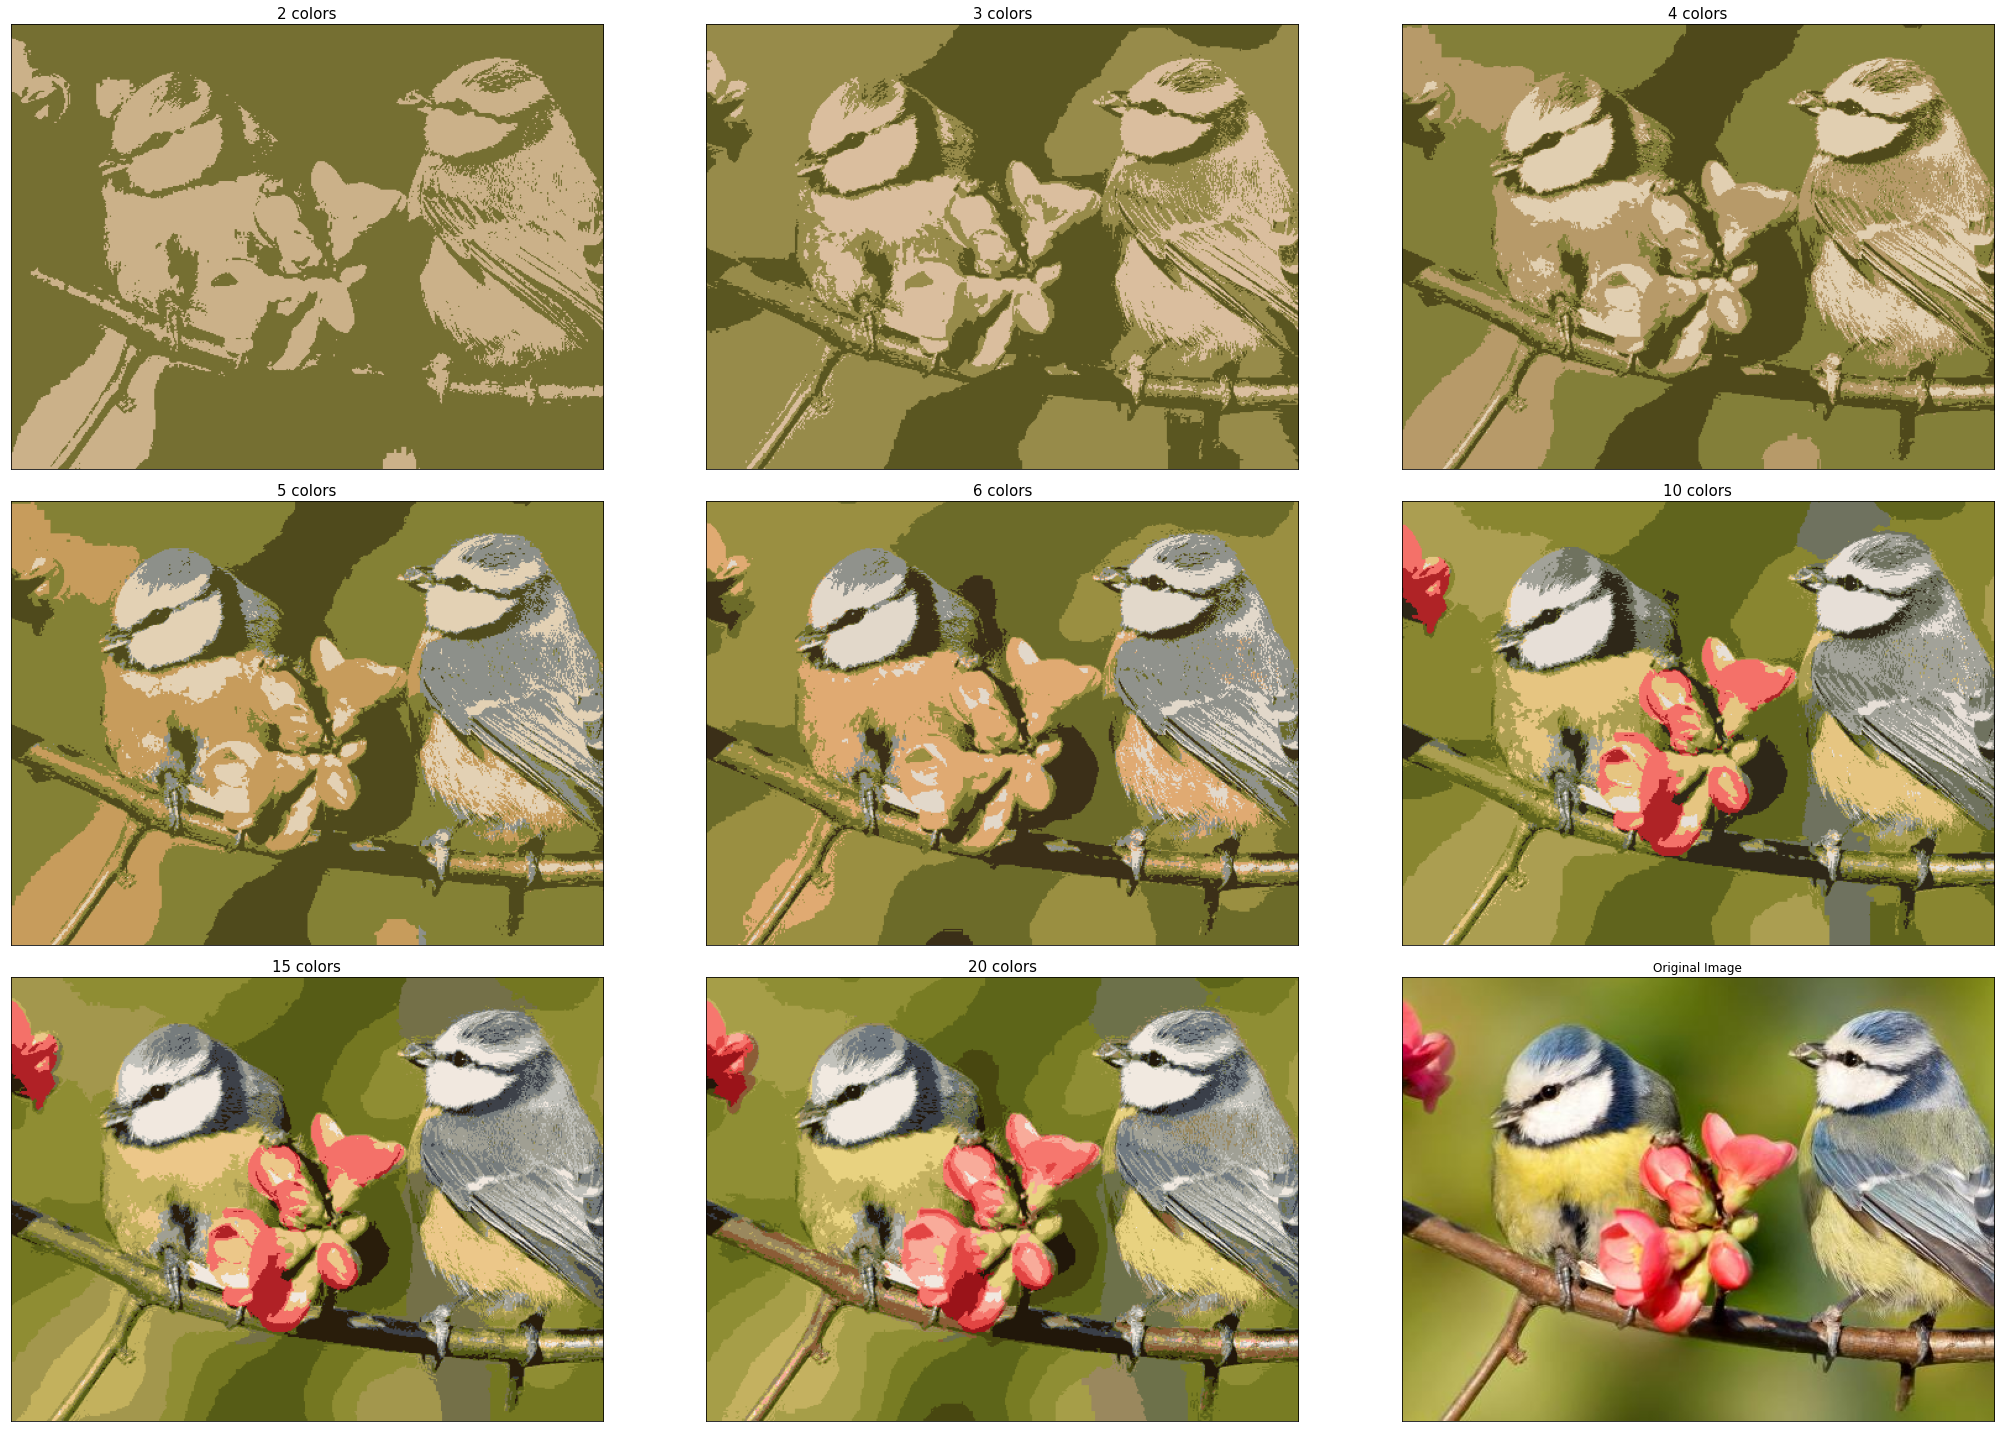

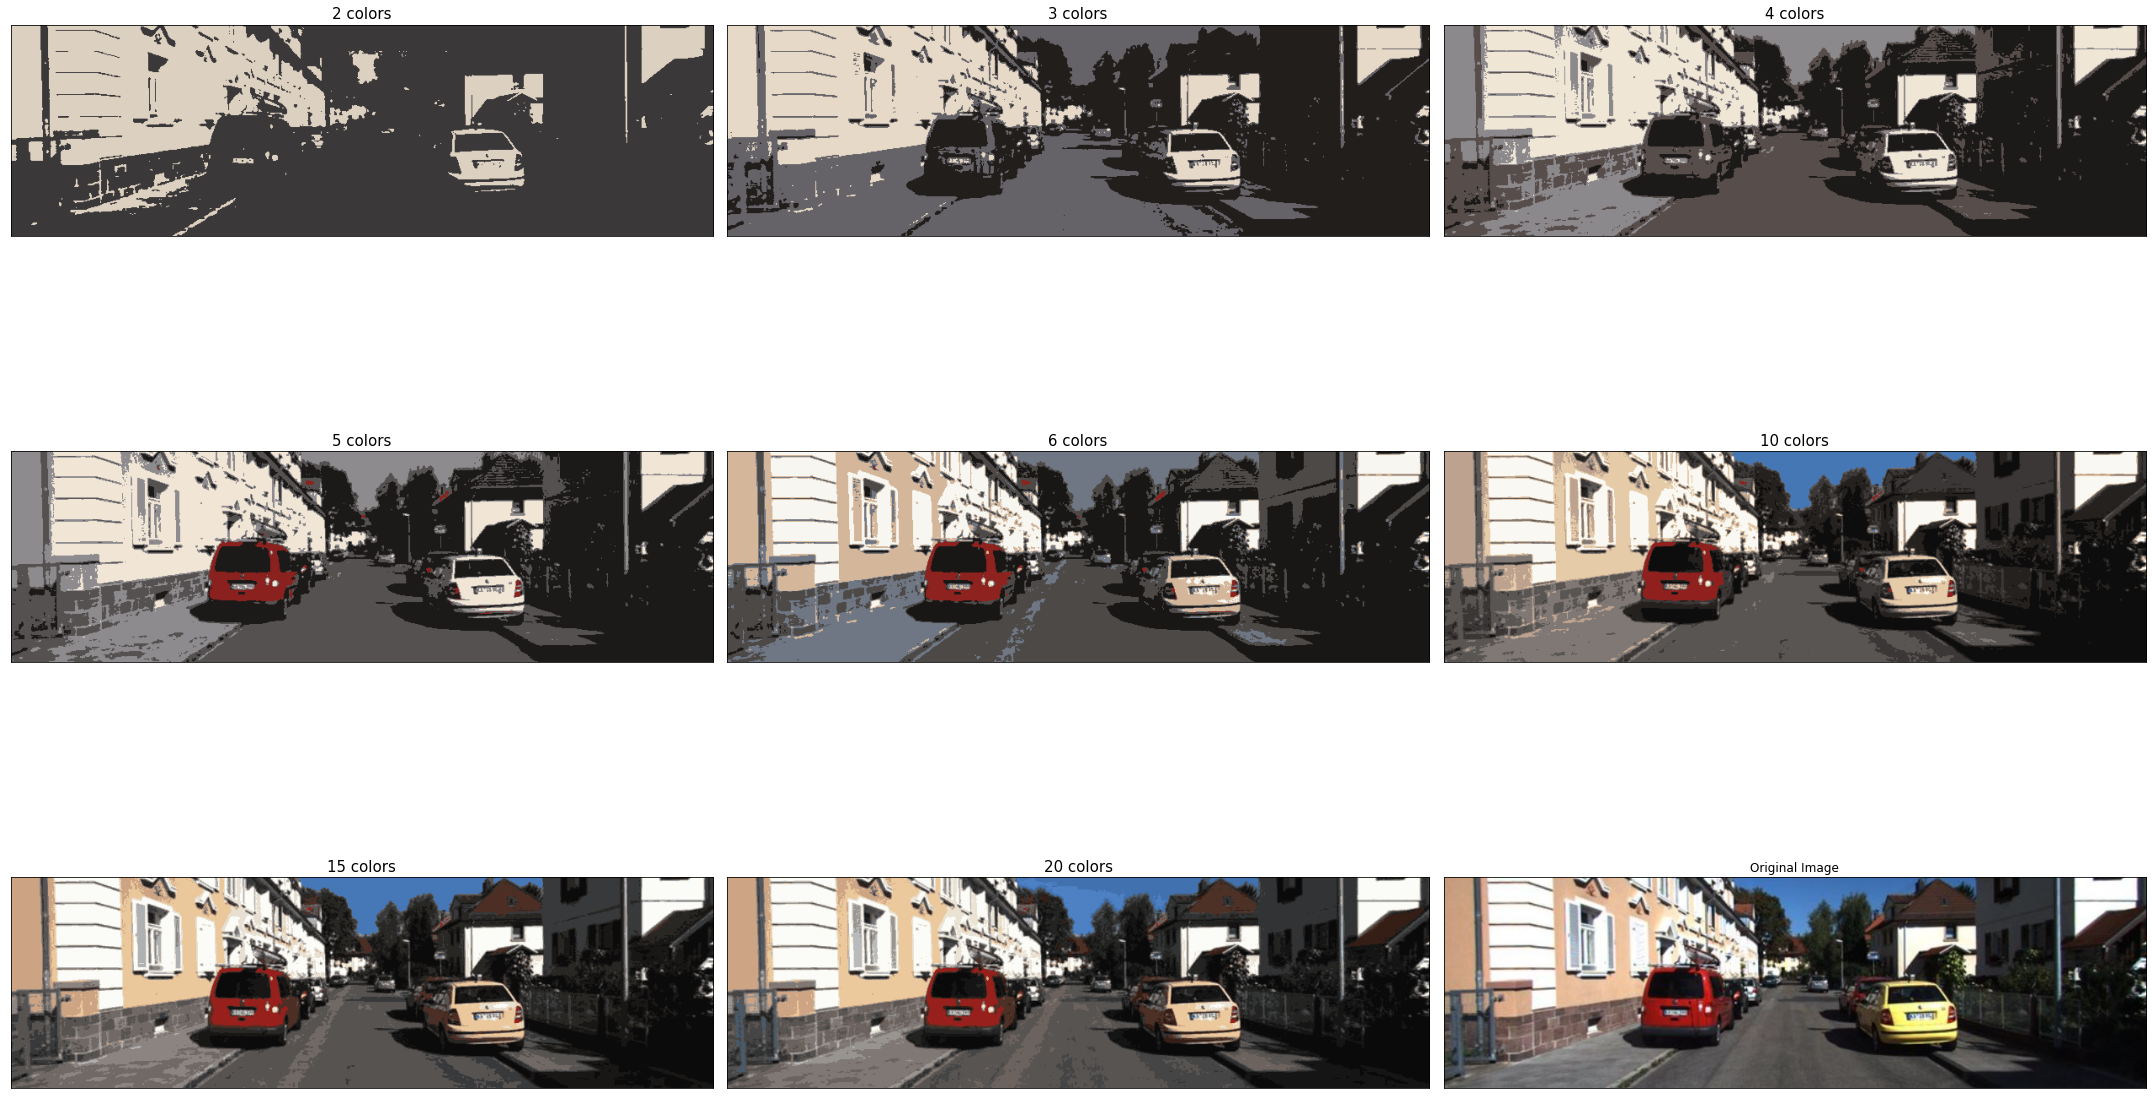

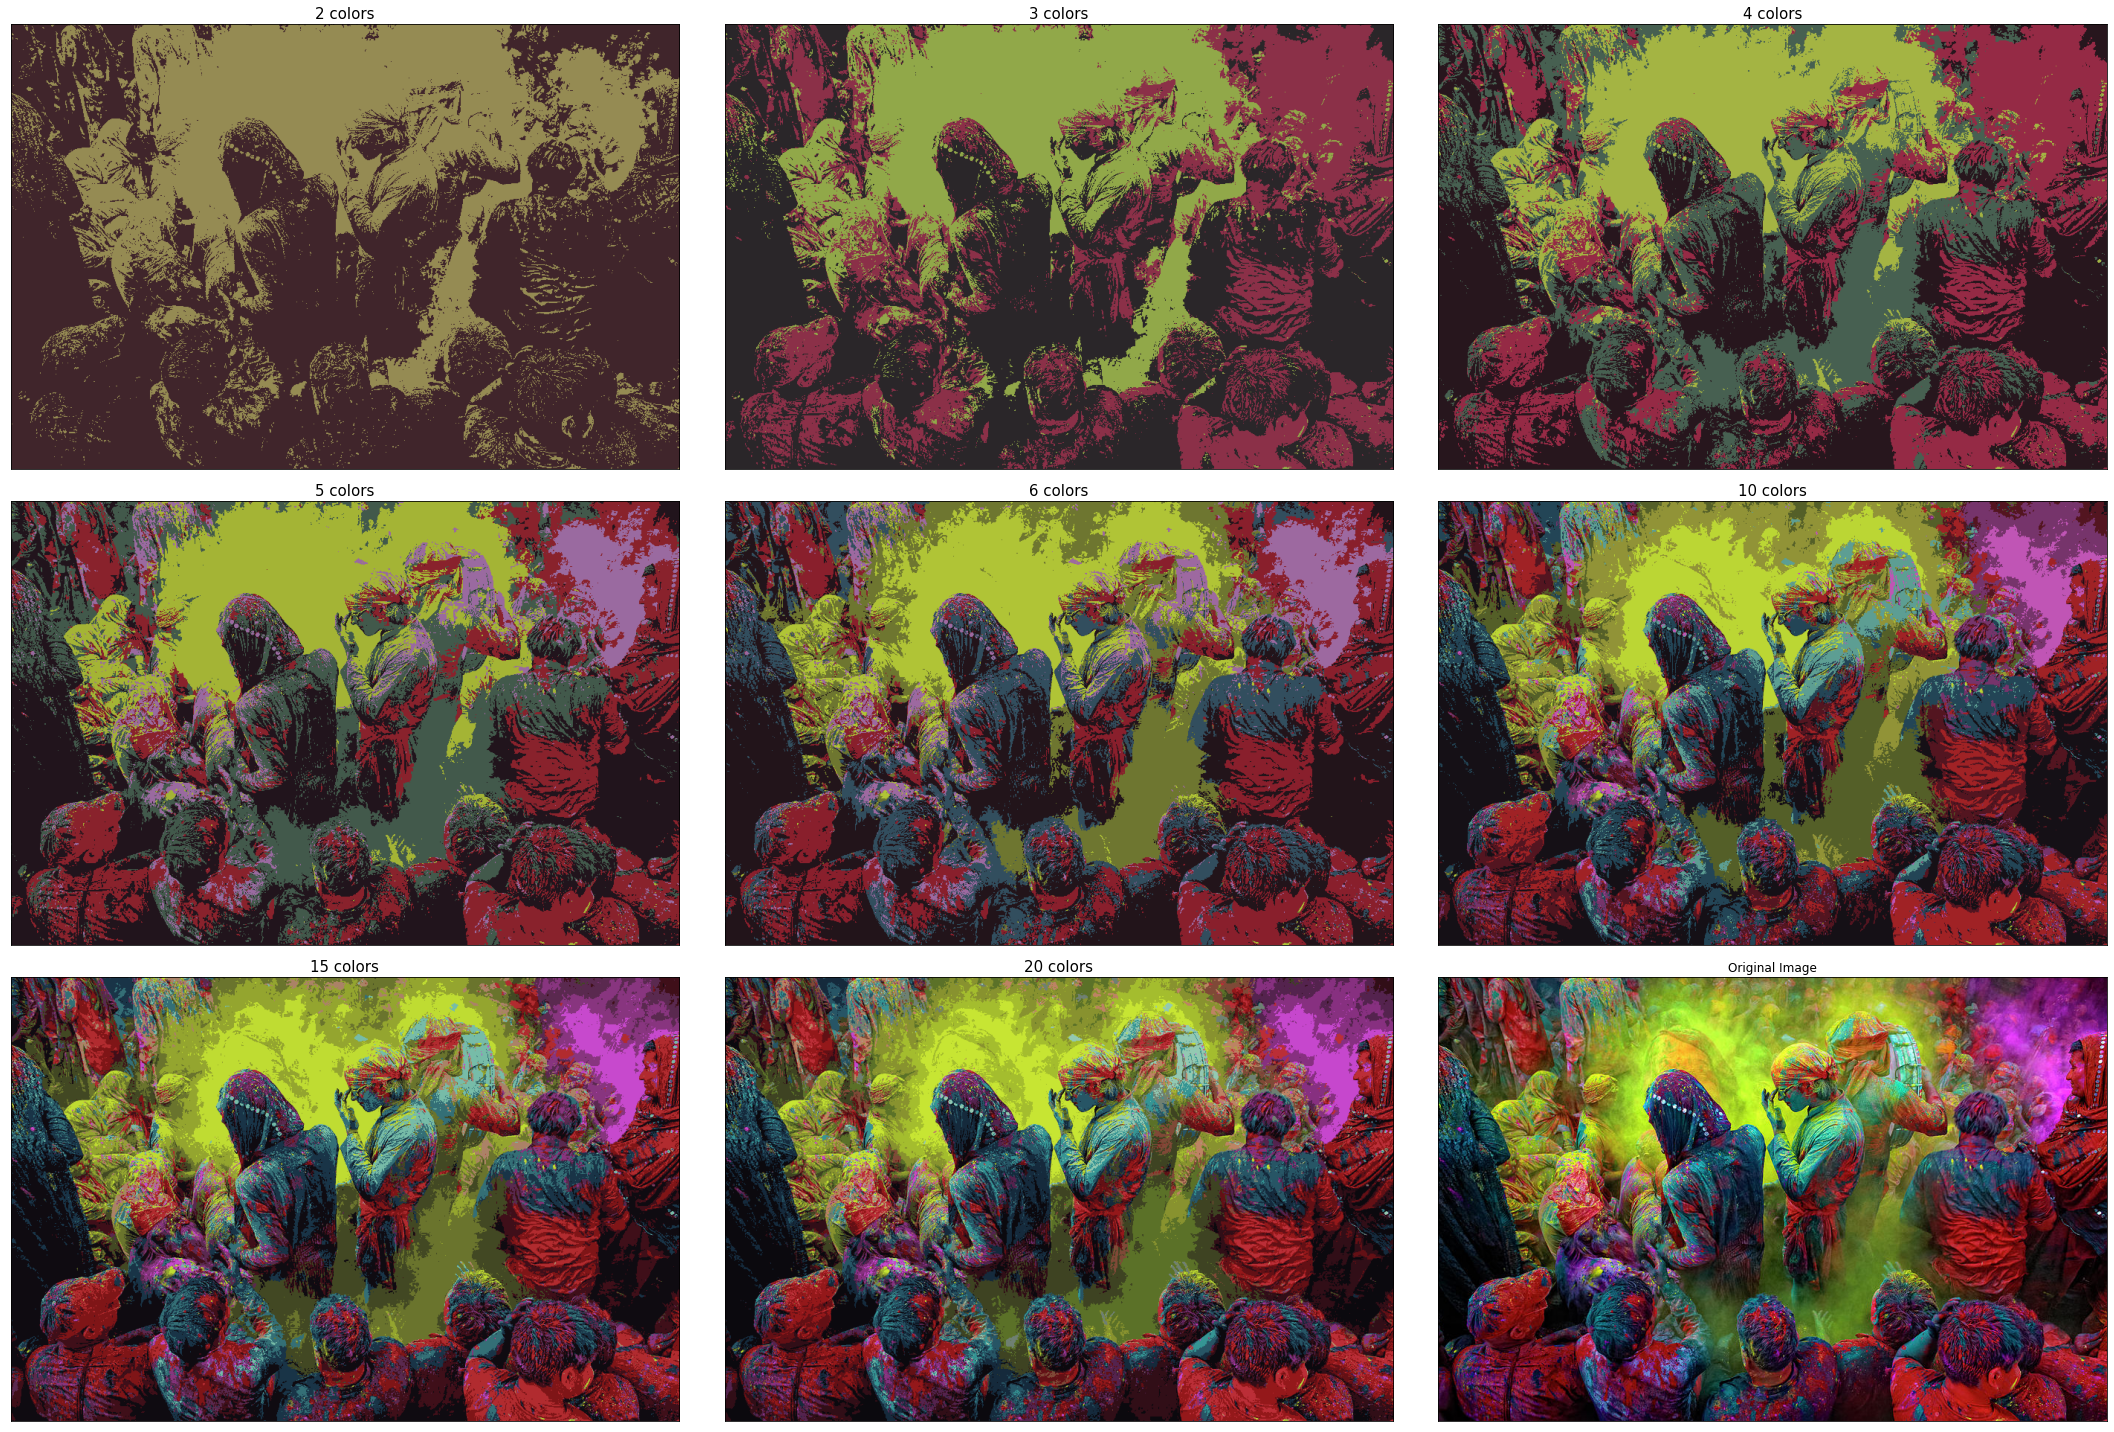

In [315]:
for i, pic in enumerate([bird, car, festival]):
    fig, ax = plt.subplots(3, 3, subplot_kw=dict(xticks=[], yticks=[]))
    for j, k in enumerate([2,3,4,5,6,10,15,20]):
        pixels = np.reshape(pic, (-1,3)).copy()
        center, y_predicted = kmeans(pixels, k)
        for m,y in enumerate(y_predicted):
            pixels[m] = center[y]
        segmented_pic = np.reshape(pixels, pic.shape)
        ax[j//3, j%3].imshow(cv2.cvtColor(segmented_pic.astype(np.uint8), cv2.COLOR_BGR2RGB))
        ax[j//3, j%3].set_title(f'{k} colors', fontsize=15)
    ax[-1, -1].imshow(cv2.cvtColor(pic.astype(np.uint8), cv2.COLOR_BGR2RGB))
    ax[-1, -1].set_title('Original Image')

    fig.set_size_inches(30,20)
    fig.show()
    if SAVE_FIGURE:
        fig.tight_layout()
        plt.savefig(f'../images/q1/{i}.png')